In [98]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


In [99]:
df=pd.read_csv("D:\\Machine Learning\\files\\train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [100]:
df.sample()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
53939,53939,36557,Male,Loyal Customer,26,Business travel,Business,1197,4,4,...,4,2,3,4,2,1,4,0,0.0,satisfied


In [101]:
#from google.colab import drive
#drive.mount('/content/drive')

# Understanding Data

In [102]:
df.shape

(103904, 25)

In [103]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [104]:
df.rename(columns = {'Customer Type':'CustomerType','Type of Travel':'TypeofTravel','Flight Distance':'FlightDistance'
, 'Inflight wifi service':'Inflightwifiservice',
       'Departure/Arrival time convenient':'DepartureArrivaltimeconvenient', 'Ease of Online booking':'EaseofOnlinebooking' ,
       'Gate location':'Gatelocation', 'Food and drink':'Foodanddrink', 'Online boarding':'Onlineboarding', 'Seat comfort':'Seatcomfort',
       'Inflight entertainment':'Inflightentertainment', 'On-board service':'Onboardservice', 'Leg room service':'Legroomservice',
       'Baggage handling':'Baggagehandling', 'Checkin service':'Checkinservice', 'Inflight service':'Inflightservice',
       'Departure Delay in Minutes':'DepartureDelayinMinutes', 'Arrival Delay in Minutes':'ArrivalDelayinMinutes'}, inplace = True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      103904 non-null  int64  
 1   id                              103904 non-null  int64  
 2   Gender                          103904 non-null  object 
 3   CustomerType                    103904 non-null  object 
 4   Age                             103904 non-null  int64  
 5   TypeofTravel                    103904 non-null  object 
 6   Class                           103904 non-null  object 
 7   FlightDistance                  103904 non-null  int64  
 8   Inflightwifiservice             103904 non-null  int64  
 9   DepartureArrivaltimeconvenient  103904 non-null  int64  
 10  EaseofOnlinebooking             103904 non-null  int64  
 11  Gatelocation                    103904 non-null  int64  
 12  Foodanddrink    

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
FlightDistance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflightwifiservice,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
DepartureArrivaltimeconvenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
EaseofOnlinebooking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gatelocation,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Foodanddrink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Onlineboarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


#### Cheking percentage of null values

In [107]:

for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%")  

ArrivalDelayinMinutes --------- 0.29835232522328303 %


#### Drop column id as it is not usefull

In [108]:
df.drop(columns=['id','Unnamed: 0'],inplace=True)

In [109]:
df = df.replace(r'^\s*$', np.nan, regex=True)

#### Filling the missing values with 0

In [110]:
df['ArrivalDelayinMinutes'].fillna(0,inplace=True)

In [111]:
df['ArrivalDelayinMinutes'].isnull().sum()

0

# Analysis

#### Finding New features

<Axes: xlabel='Age', ylabel='Count'>

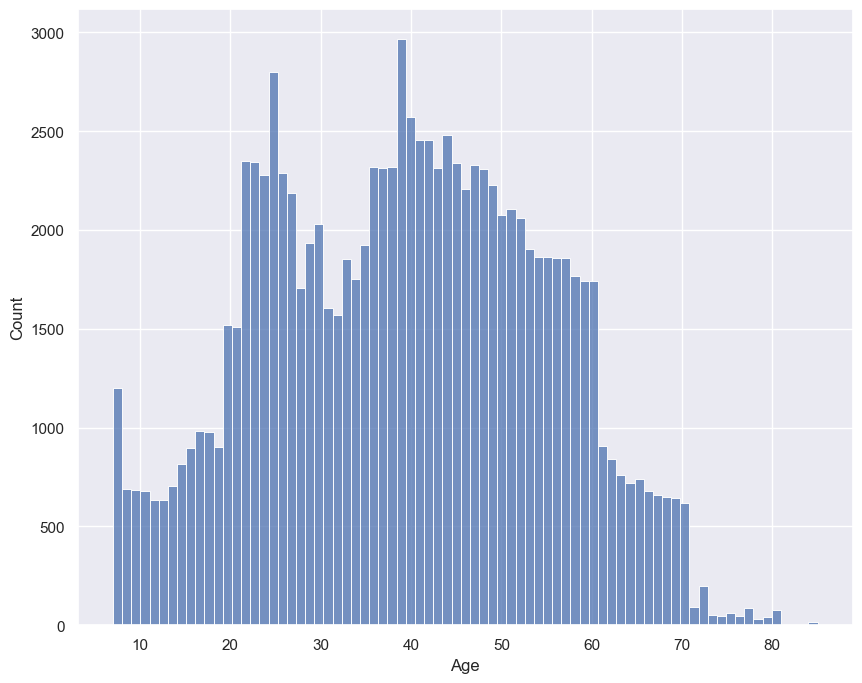

In [112]:
plt.figure(figsize=[10,8])
sns.histplot(x='Age',data=df)

In [113]:
df.sample()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,...,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
88188,Female,disloyal Customer,45,Business travel,Business,1089,3,3,3,5,...,4,5,4,5,3,5,4,117,111.0,neutral or dissatisfied


C:\Users\diaay\AppData\Local\Temp\ipykernel_22016\3897632671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


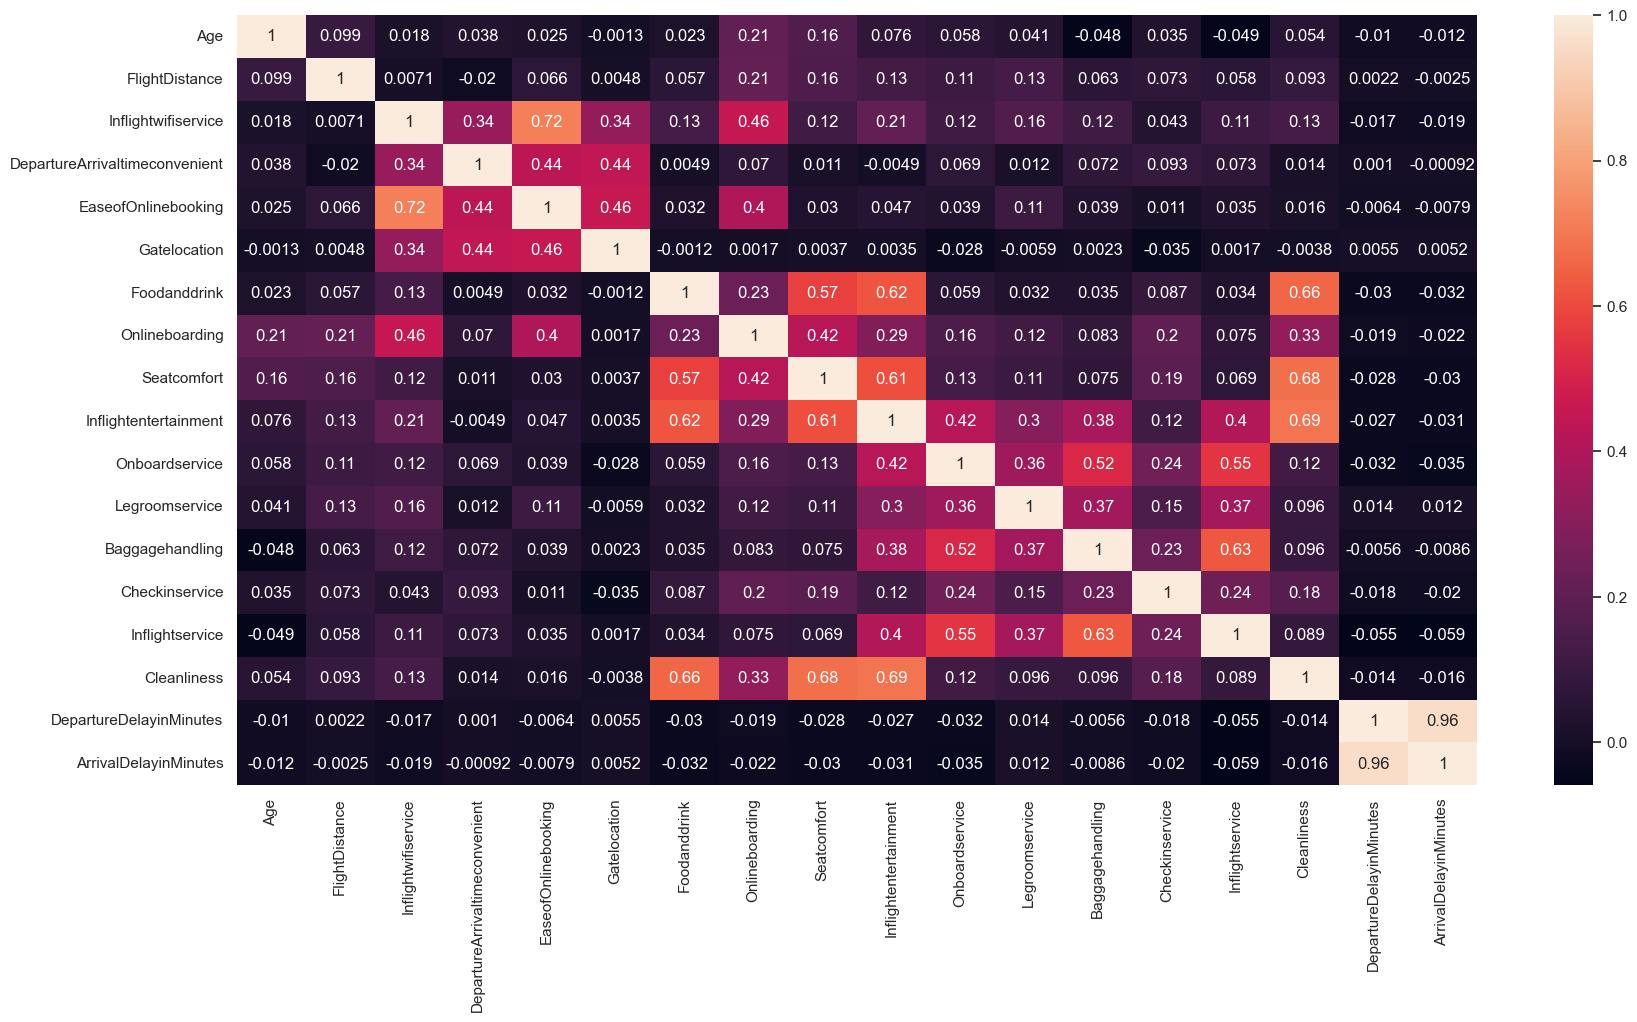

In [114]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True);

In [115]:
#plt.figure(figsize=[15,8])
#sns.scatterplot(df['Age'],df['Flight Distance'])

<Axes: xlabel='Gender', ylabel='count'>

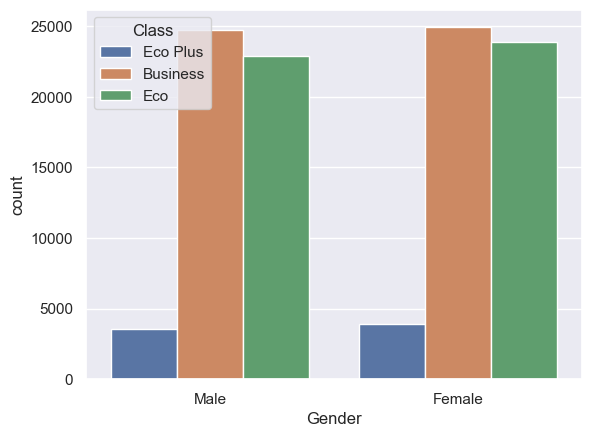

In [116]:
sns.countplot(x=df['Gender'],hue='Class',data=df)

Female    52727
Male      51177
Name: Gender, dtype: int64


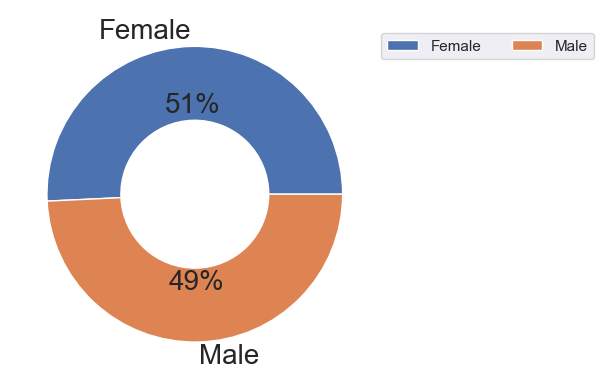

In [117]:
## How many males and females were travelling
g=df["Gender"].value_counts()
print(g)
plt.pie(g,labels=df["Gender"].value_counts().index,autopct="%0.0f%%",wedgeprops={"width":0.5},textprops={"fontsize":20})
plt.legend(loc="center right",bbox_to_anchor=(1.6, 0.9),ncol=2);

<Axes: xlabel='Class', ylabel='count'>

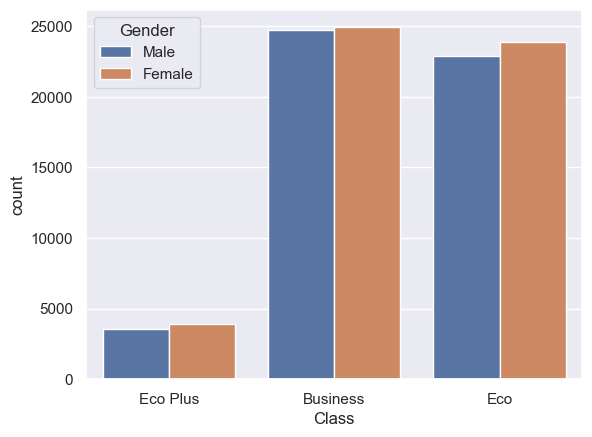

In [118]:
sns.countplot(x='Class',hue='Gender',data=df)

In [119]:
((df['Class']=='Eco')&(df['satisfaction']=='neutral or dissatisfied')).value_counts()

False    65860
True     38044
dtype: int64

In [120]:
(38044/58879)*100

64.6138691214185

<Axes: xlabel='satisfaction', ylabel='count'>

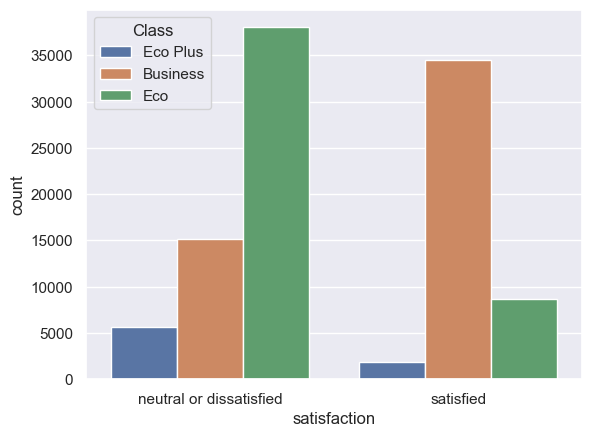

In [121]:
#plt.figure(figsize=[15,8])
sns.countplot(x='satisfaction',hue='Class',data=df)

<Axes: xlabel='Inflightwifiservice', ylabel='count'>

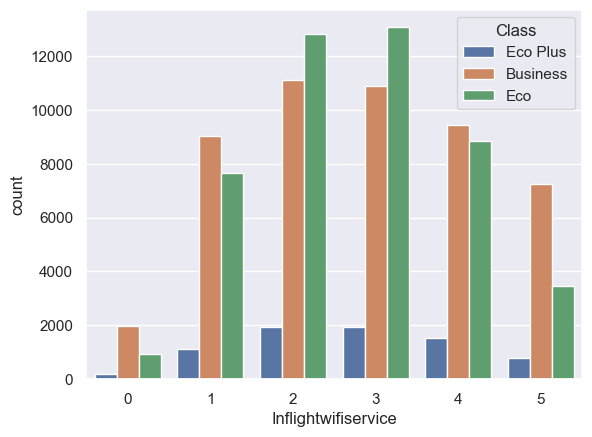

In [122]:
sns.countplot(x='Inflightwifiservice',hue='Class',data=df)

<Axes: xlabel='DepartureArrivaltimeconvenient', ylabel='count'>

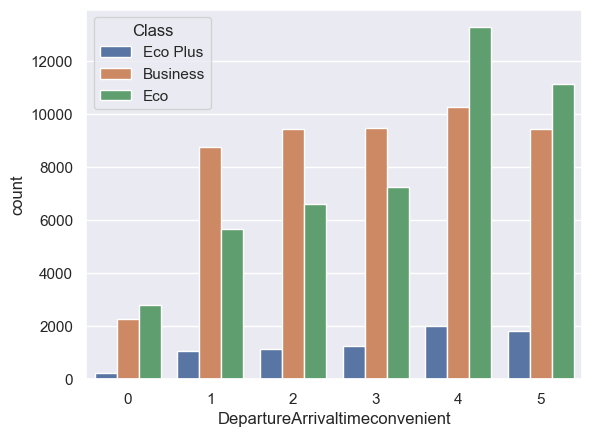

In [123]:
sns.countplot(x='DepartureArrivaltimeconvenient',hue='Class',data=df)

<Axes: xlabel='EaseofOnlinebooking', ylabel='count'>

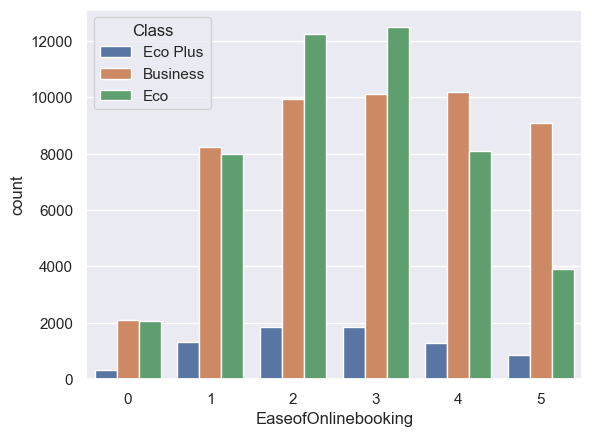

In [124]:
sns.countplot(x='EaseofOnlinebooking',hue='Class',data=df)

<Axes: xlabel='Foodanddrink', ylabel='count'>

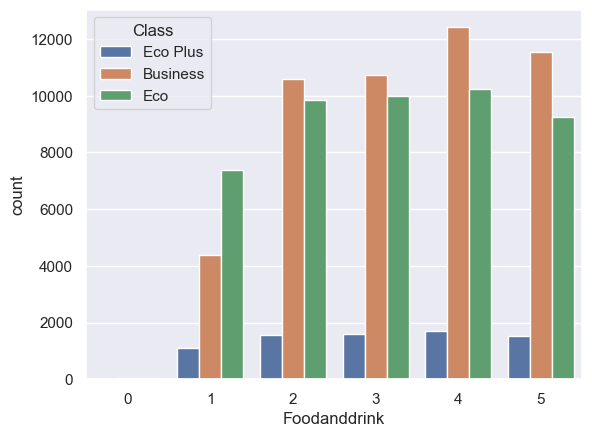

In [125]:
sns.countplot(x='Foodanddrink',hue='Class',data=df)

<Axes: xlabel='Gatelocation', ylabel='count'>

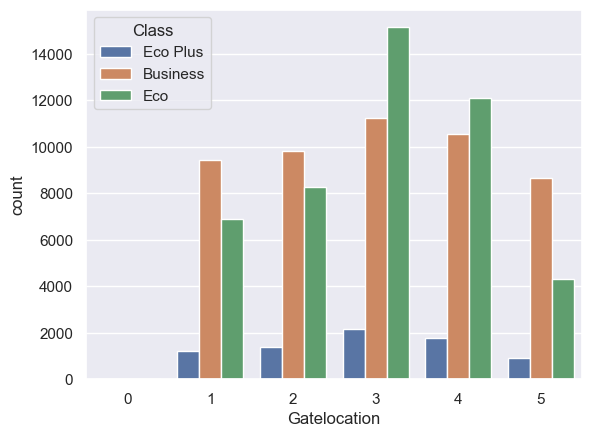

In [126]:

sns.countplot(x='Gatelocation',hue='Class',data=df)

<Axes: xlabel='Cleanliness', ylabel='count'>

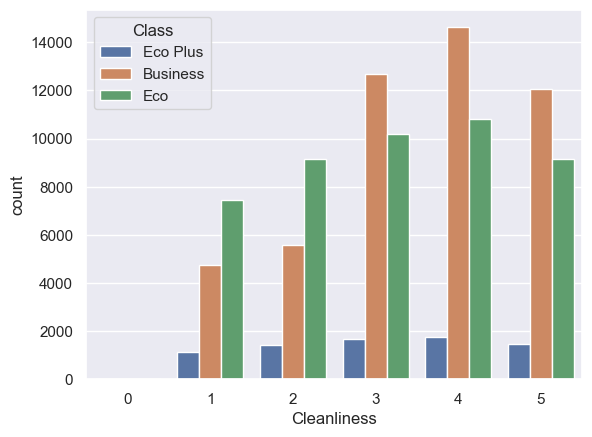

In [127]:
sns.countplot(x=df['Cleanliness'],hue=df['Class'])

<Axes: xlabel='CustomerType', ylabel='count'>

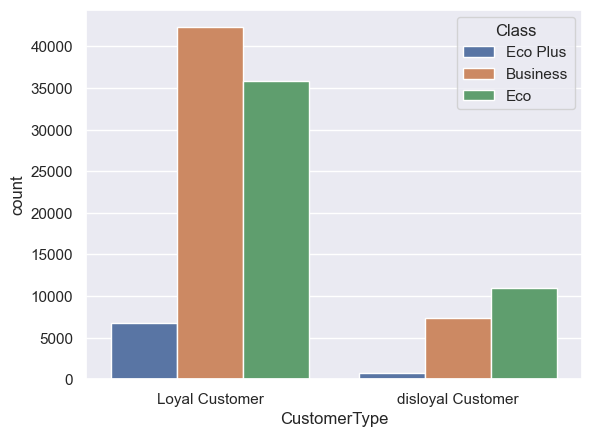

In [128]:
#plt.figure(figsize=[15,8])

sns.countplot(x='CustomerType',hue='Class',data=df)

<Axes: xlabel='Onlineboarding', ylabel='count'>

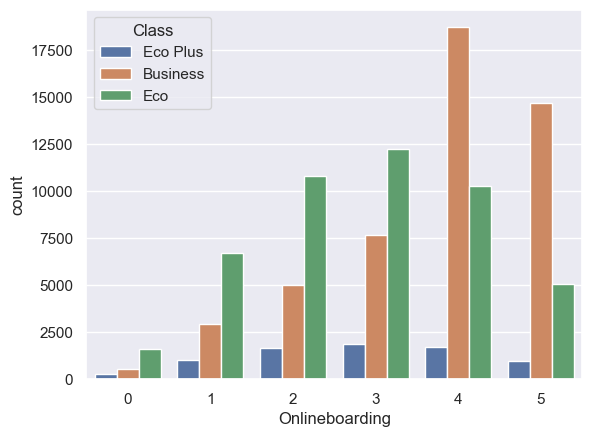

In [129]:
sns.countplot(x=df['Onlineboarding'],hue=df['Class'])

In [130]:
#sns.countplot(x=df['Inflightservice'],hue=df['Class'])

<Axes: xlabel='Checkinservice', ylabel='count'>

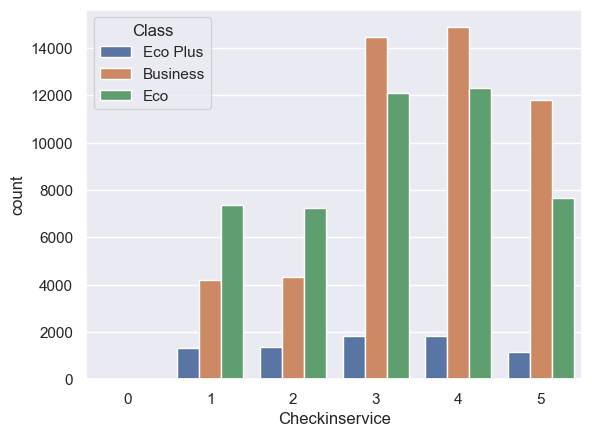

In [131]:
sns.countplot(x=df['Checkinservice'],hue=df['Class'],)


<Axes: xlabel='Seatcomfort', ylabel='count'>

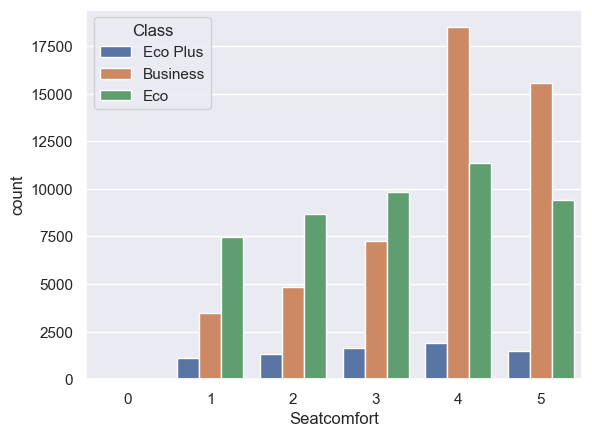

In [132]:
sns.countplot(x=df['Seatcomfort'],hue=df['Class'])

<Axes: xlabel='Inflightentertainment', ylabel='count'>

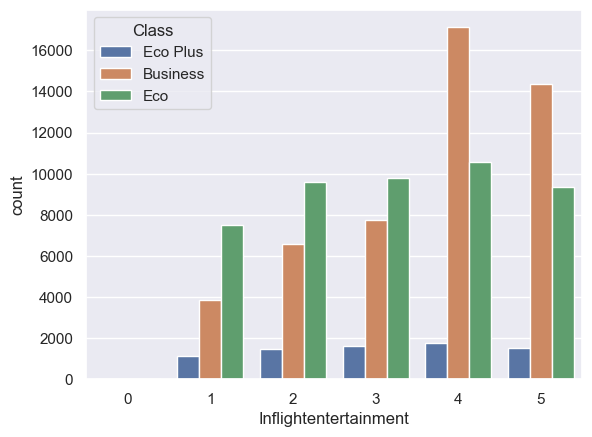

In [133]:
sns.countplot(x=df['Inflightentertainment'],hue=df['Class'])

<Axes: xlabel='Baggagehandling', ylabel='count'>

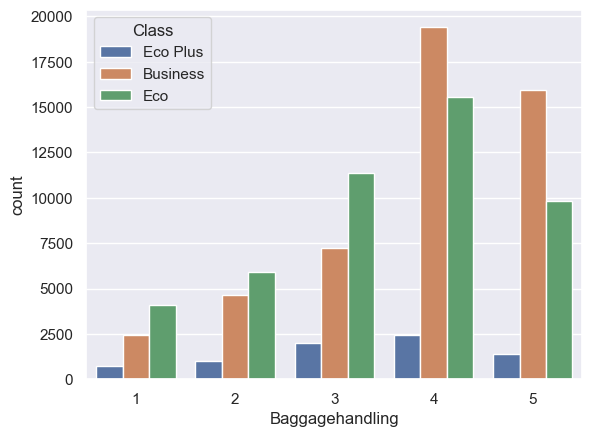

In [134]:
sns.countplot(x=df['Baggagehandling'],hue=df['Class'])

<Axes: xlabel='Legroomservice', ylabel='count'>

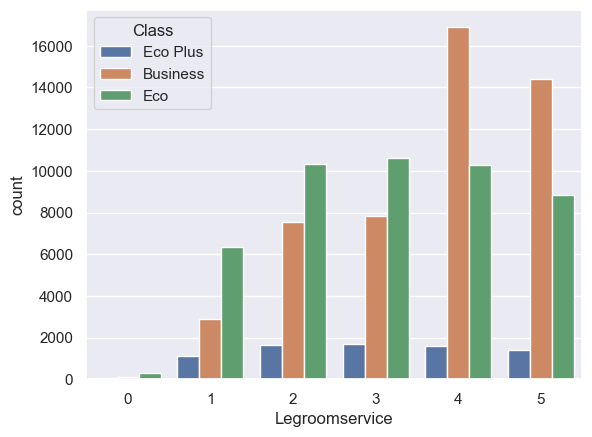

In [135]:
sns.countplot(x=df['Legroomservice'],hue=df['Class'])

<Axes: xlabel='Onboardservice', ylabel='count'>

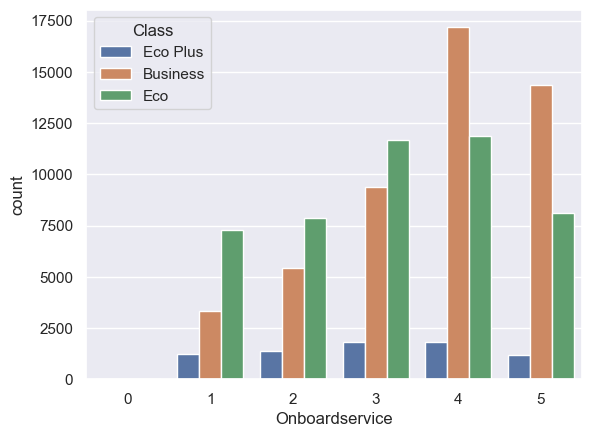

In [136]:
sns.countplot(x=df['Onboardservice'],hue=df['Class'])

In [137]:
#import matplotlib.pyplot as plt
#sns.histplot(x='FlightDistance',hue='Class',data=df,bins=32)

In [138]:
(df['Inflightentertainment']==(3)).value_counts()

False    84765
True     19139
Name: Inflightentertainment, dtype: int64

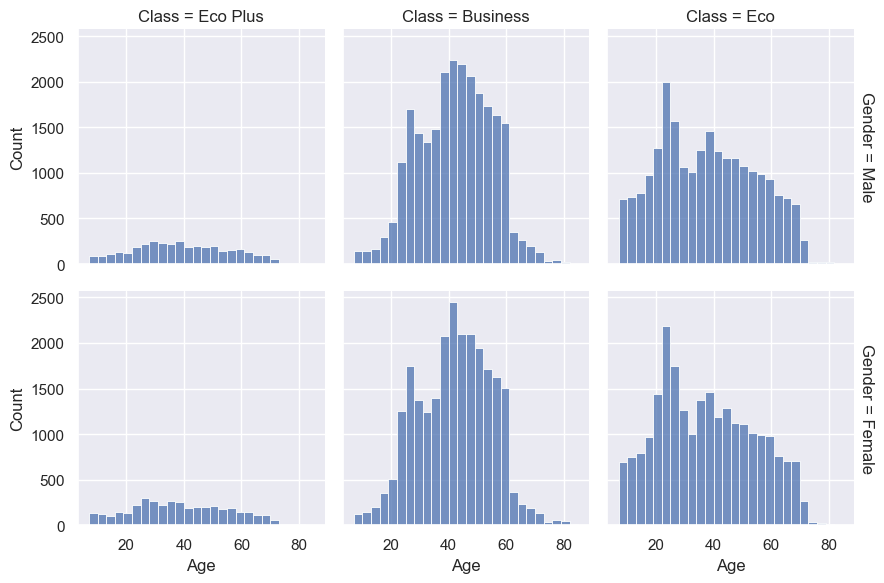

In [139]:
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.displot(data=df, x="Age", col="Class", row="Gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

# preprocssing 

In [140]:
df.dtypes

Gender                             object
CustomerType                       object
Age                                 int64
TypeofTravel                       object
Class                              object
FlightDistance                      int64
Inflightwifiservice                 int64
DepartureArrivaltimeconvenient      int64
EaseofOnlinebooking                 int64
Gatelocation                        int64
Foodanddrink                        int64
Onlineboarding                      int64
Seatcomfort                         int64
Inflightentertainment               int64
Onboardservice                      int64
Legroomservice                      int64
Baggagehandling                     int64
Checkinservice                      int64
Inflightservice                     int64
Cleanliness                         int64
DepartureDelayinMinutes             int64
ArrivalDelayinMinutes             float64
satisfaction                       object
dtype: object

### Filling missing Values By Median

In [141]:
df.isna().sum()

Gender                            0
CustomerType                      0
Age                               0
TypeofTravel                      0
Class                             0
FlightDistance                    0
Inflightwifiservice               0
DepartureArrivaltimeconvenient    0
EaseofOnlinebooking               0
Gatelocation                      0
Foodanddrink                      0
Onlineboarding                    0
Seatcomfort                       0
Inflightentertainment             0
Onboardservice                    0
Legroomservice                    0
Baggagehandling                   0
Checkinservice                    0
Inflightservice                   0
Cleanliness                       0
DepartureDelayinMinutes           0
ArrivalDelayinMinutes             0
satisfaction                      0
dtype: int64

### handle outlires

In [142]:
df.describe()

,Age,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Chicking Outliers
Flight Distance	
Arrival Delay in Minutes
Departure Delay in Minutes	

<Axes: xlabel='ArrivalDelayinMinutes'>

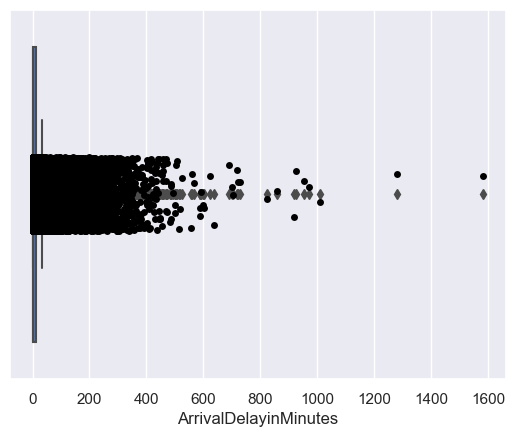

In [143]:
import seaborn as sns 
sns.boxplot(x=df['ArrivalDelayinMinutes'],data=df)
sns.stripplot(x=df['ArrivalDelayinMinutes'],data=df,color='black')

<Axes: xlabel='DepartureDelayinMinutes'>

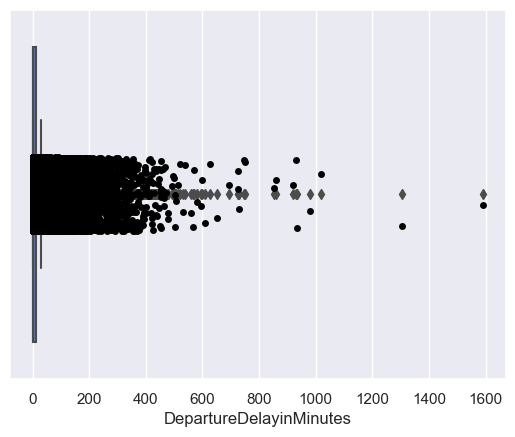

In [144]:
import seaborn as sns 
sns.boxplot(x=df['DepartureDelayinMinutes'],data=df)
sns.stripplot(x=df['DepartureDelayinMinutes'],data=df,color='black')

In [145]:
#import seaborn as sns 
#sns.boxplot(x=df['FlightDistance'],data=df)
#sns.stripplot(x=df['FlightDistance'],data=df,color='black')

In [146]:
df.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeofTravel', 'Class',
       'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking', 'Gatelocation',
       'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness',
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes', 'satisfaction'],
      dtype='object')

Handling Outliers , Did not use frist way to save Data

In [147]:
! pip install datasist

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Gender                          103904 non-null  object 
 1   CustomerType                    103904 non-null  object 
 2   Age                             103904 non-null  int64  
 3   TypeofTravel                    103904 non-null  object 
 4   Class                           103904 non-null  object 
 5   FlightDistance                  103904 non-null  int64  
 6   Inflightwifiservice             103904 non-null  int64  
 7   DepartureArrivaltimeconvenient  103904 non-null  int64  
 8   EaseofOnlinebooking             103904 non-null  int64  
 9   Gatelocation                    103904 non-null  int64  
 10  Foodanddrink                    103904 non-null  int64  
 11  Onlineboarding                  103904 non-null  int64  
 12  Seatcomfort     

In [149]:
from datasist.structdata import detect_outliers
index = detect_outliers(df,0,['FlightDistance','ArrivalDelayinMinutes','DepartureDelayinMinutes'])
len(index)

18535

In [150]:
for i in ['FlightDistance','ArrivalDelayinMinutes','DepartureDelayinMinutes']:
  detect_outlier_index = detect_outliers(df,0,[i])
  median = df[i].median()
  df[i].iloc[detect_outlier_index] = median


C:\Users\diaay\AppData\Local\Temp\ipykernel_22016\1085498911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[detect_outlier_index] = median
C:\Users\diaay\AppData\Local\Temp\ipykernel_22016\1085498911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[detect_outlier_index] = median
C:\Users\diaay\AppData\Local\Temp\ipykernel_22016\1085498911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[detec

<Axes: xlabel='DepartureDelayinMinutes'>

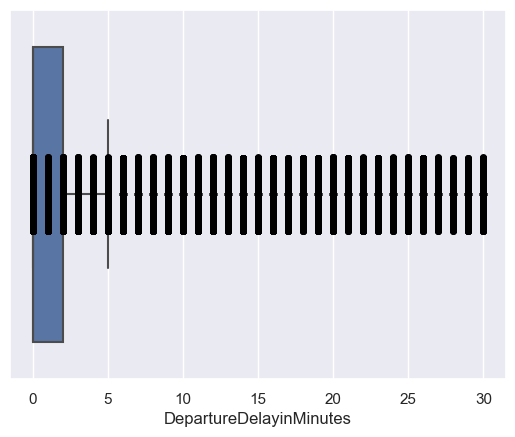

In [151]:
import seaborn as sns 
sns.boxplot(x=df['DepartureDelayinMinutes'],data=df)
sns.stripplot(x=df['DepartureDelayinMinutes'],data=df,color='black')

<Axes: xlabel='FlightDistance'>

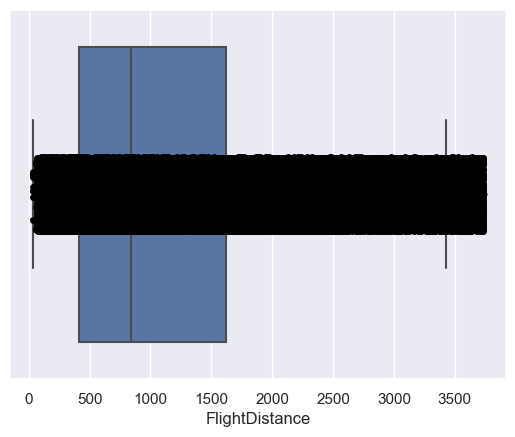

In [152]:
import seaborn as sns 
sns.boxplot(x=df['FlightDistance'],data=df)
sns.stripplot(x=df['FlightDistance'],data=df,color='black')

<Axes: xlabel='ArrivalDelayinMinutes'>

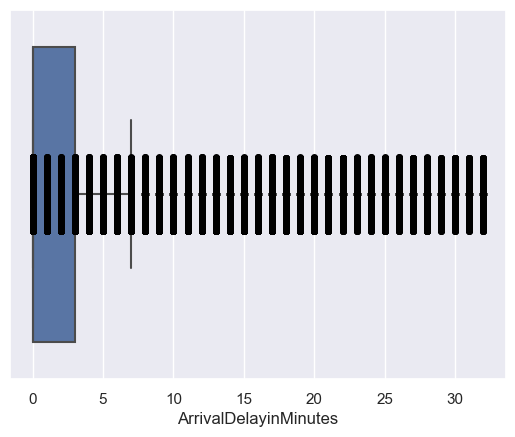

In [153]:
import seaborn as sns 
sns.boxplot(x=df['ArrivalDelayinMinutes'],data=df)
sns.stripplot(x=df['ArrivalDelayinMinutes'],data=df,color='black')

### Split into input and output

In [154]:
x=df.drop('satisfaction',axis=1)
y=df['satisfaction']
x

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,...,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,14.0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0.0


### Dealing with catigorical data

In [155]:
x = pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)


In [156]:
x

,Age,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,...,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,Gender_Male,CustomerType_disloyal Customer,TypeofTravel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,2,3,2,3,0.0,0,1,0,1,0
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,4,0,0.0,1,0,0,0,0
103901,30,1995,1,1,1,3,4,1,5,4,...,5,5,4,7,14.0,1,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,5,4,1,0,0.0,0,1,0,1,0


### Split into train and test

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 0,stratify=y)

In [158]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest
fs = SelectKBest(mutual_info_classif,k='all')
fs = fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


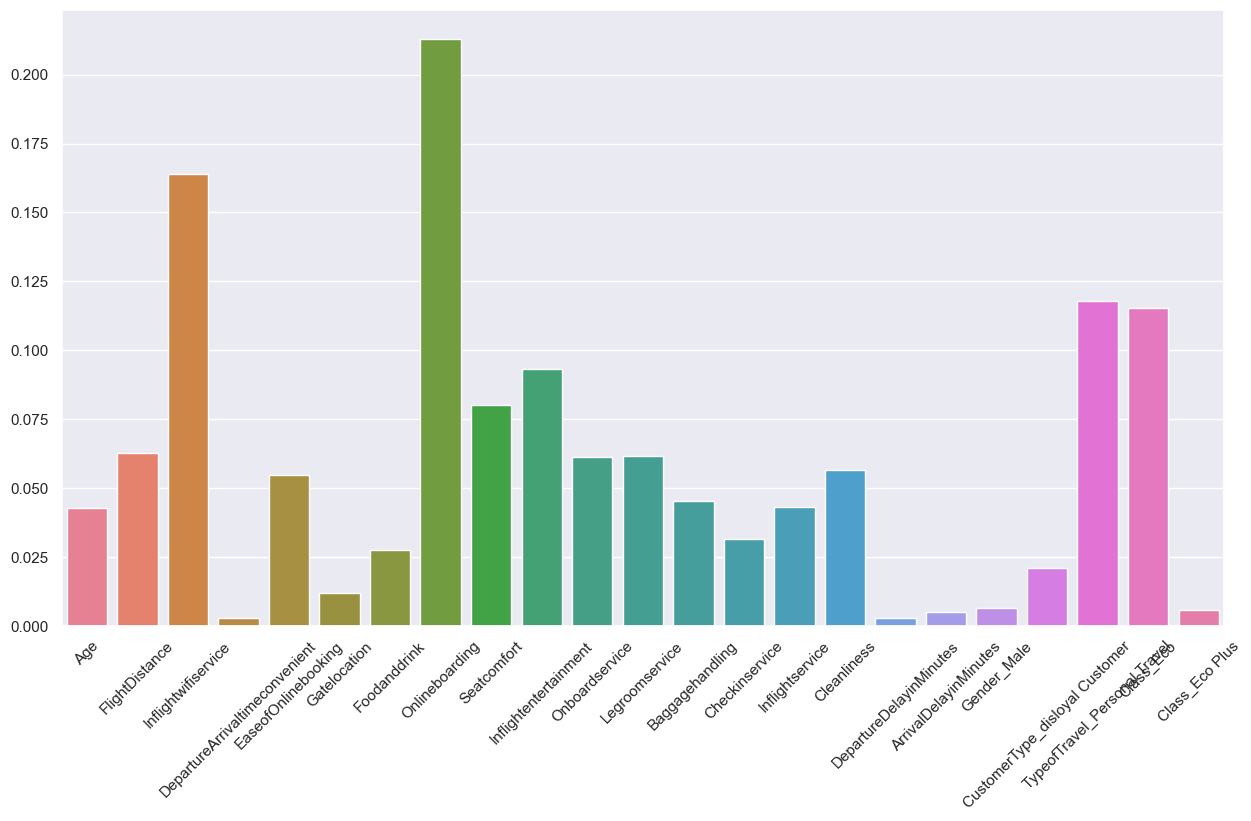

In [159]:
plt.figure(figsize=[15,8])
sns.barplot(x=[i for i in fs.feature_names_in_],y=fs.scores_,palette='husl')
plt.xticks(rotation=45);

In [160]:
x_train

,Age,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,...,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,Gender_Male,CustomerType_disloyal Customer,TypeofTravel_Personal Travel,Class_Eco,Class_Eco Plus
76777,63,496,1,4,5,3,1,5,1,1,...,3,5,1,0,0.0,1,0,1,1,0
14257,44,2083,1,1,1,1,5,1,4,4,...,1,4,1,0,0.0,0,0,0,0,0
29805,51,1426,2,1,2,2,5,5,4,5,...,4,5,3,0,0.0,1,0,0,0,0
48471,23,2167,4,4,4,4,4,4,4,4,...,1,5,4,0,0.0,1,0,0,0,0
7052,27,1487,4,2,2,2,4,3,4,4,...,2,3,4,0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44119,18,399,2,1,2,4,5,2,5,5,...,1,4,5,0,0.0,0,1,0,1,0
12991,59,467,2,2,2,4,3,2,3,3,...,4,3,3,0,8.0,1,1,0,1,0
81006,28,641,2,1,1,4,1,1,1,1,...,3,5,1,0,0.0,1,1,0,0,0
51449,51,1892,3,4,4,4,3,3,3,3,...,2,3,3,2,0.0,1,0,0,1,0


In [161]:
fs = SelectKBest(mutual_info_classif,k=10)
fs = fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
x_train_fs = pd.DataFrame(x_train_fs,columns=fs.get_feature_names_out())
x_train_fs

,FlightDistance,Inflightwifiservice,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Cleanliness,TypeofTravel_Personal Travel,Class_Eco
0,496.0,1.0,5.0,1.0,1.0,5.0,4.0,1.0,1.0,1.0
1,2083.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,0.0,0.0
2,1426.0,2.0,5.0,4.0,5.0,5.0,5.0,3.0,0.0,0.0
3,2167.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,0.0,0.0
4,1487.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
83118,399.0,2.0,2.0,5.0,5.0,3.0,4.0,5.0,0.0,1.0
83119,467.0,2.0,2.0,3.0,3.0,4.0,1.0,3.0,0.0,1.0
83120,641.0,2.0,1.0,1.0,1.0,4.0,5.0,1.0,0.0,0.0
83121,1892.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,0.0,1.0


In [163]:
y_train.value_counts()

satisfied
0            47103
1            36020
dtype: int64

### handle Imbalanced data

In [164]:
! pip install imblearn 

In [165]:
from imblearn.over_sampling import SMOTE
over_sample=SMOTE()
x_train_sampled , y_train_sampled=over_sample.fit_resample(x_train,y_train)

In [166]:
y_train_sampled.value_counts()

satisfied
0            47103
1            47103
dtype: int64

### Feature Scaling

In [167]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_sampled)
x_test_scaled=scaler.transform(x_test)


In [168]:
x_train_scaled=pd.DataFrame(x_train_scaled)
x_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.577185,-0.708026,-1.300863,0.654417,1.608992,0.049126,-1.692264,1.271713,-1.919968,-1.848838,...,-0.248016,1.168929,-1.804436,-0.472434,-0.487529,1.073084,-0.445829,1.617386,1.209505,-0.26102
1,0.296365,0.992536,-1.300863,-1.329770,-1.252552,-1.520735,1.382609,-1.743242,0.408543,0.460641,...,-1.867522,0.303184,-1.804436,-0.472434,-0.487529,-0.931893,-0.445829,-0.618282,-0.826785,-0.26102
2,0.768246,0.288522,-0.553781,-1.329770,-0.537166,-0.735805,1.382609,1.271713,0.408543,1.230467,...,0.561737,1.168929,-0.239696,-0.472434,-0.487529,1.073084,-0.445829,-0.618282,-0.826785,-0.26102
3,-1.119278,1.082546,0.940383,0.654417,0.893606,0.834057,0.613891,0.517974,0.408543,0.460641,...,-1.867522,1.168929,0.542674,-0.472434,-0.487529,1.073084,-0.445829,-0.618282,-0.826785,-0.26102
4,-0.849631,0.353887,0.940383,-0.668374,-0.537166,-0.735805,0.613891,-0.235764,0.408543,0.460641,...,-1.057769,-0.562560,0.542674,-0.472434,-0.487529,1.073084,-0.445829,-0.618282,-0.826785,-0.26102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94201,-1.051866,2.363058,-1.300863,-1.329770,0.178220,-1.520735,0.613891,0.517974,0.408543,0.460641,...,-1.057769,-0.562560,0.542674,-0.472434,-0.487529,-0.931893,-0.445829,-0.618282,-0.826785,-0.26102
94202,-0.917043,-0.031874,1.687465,1.315813,1.608992,-0.735805,-0.923546,1.271713,-1.143798,-1.079012,...,0.561737,0.303184,-1.022066,-0.320724,-0.487529,-0.931893,2.243014,-0.618282,-0.826785,-0.26102
94203,-0.984454,-0.996275,0.940383,0.654417,0.893606,0.834057,-0.154827,0.517974,-0.367627,-0.309186,...,-1.057769,-1.428305,-0.239696,-0.472434,-0.487529,1.073084,-0.445829,-0.618282,-0.826785,-0.26102
94204,0.633423,-0.336196,-1.300863,-1.329770,-1.252552,-1.520735,-0.154827,0.517974,0.408543,0.460641,...,-0.248016,0.303184,-0.239696,0.741242,-0.487529,-0.931893,-0.445829,-0.618282,-0.826785,-0.26102


In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train_sampled)
y_pred = lr.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,lr.predict(x_train_scaled)))
print(classification_report(y_test,y_pred))

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


evaluation for training 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     47103
           1       0.88      0.87      0.87     47103

    accuracy                           0.87     94206
   macro avg       0.87      0.87      0.87     94206
weighted avg       0.87      0.87      0.87     94206

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     11776
           1       0.84      0.85      0.85      9005

    accuracy                           0.87     20781
   macro avg       0.86      0.87      0.86     20781
weighted avg       0.87      0.87      0.87     20781



In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train_sampled)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,knn.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_knn))


c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


evaluation for training 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     47103
           1       0.97      0.92      0.94     47103

    accuracy                           0.95     94206
   macro avg       0.95      0.95      0.95     94206
weighted avg       0.95      0.95      0.95     94206

evaluation for testing 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93     11776
           1       0.93      0.88      0.91      9005

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



In [171]:
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train_sampled)
y_pred_nb = nb.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,nb.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_nb))

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


evaluation for training 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86     47103
           1       0.89      0.82      0.85     47103

    accuracy                           0.86     94206
   macro avg       0.86      0.86      0.86     94206
weighted avg       0.86      0.86      0.86     94206

evaluation for testing 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88     11776
           1       0.85      0.81      0.83      9005

    accuracy                           0.86     20781
   macro avg       0.86      0.85      0.85     20781
weighted avg       0.86      0.86      0.86     20781



In [173]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train_sampled)
y_pred_rf = rf.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,rf.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_rf))

C:\Users\diaay\AppData\Local\Temp\ipykernel_22016\3555490250.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_scaled,y_train_sampled)


evaluation for training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47103
           1       1.00      1.00      1.00     47103

    accuracy                           1.00     94206
   macro avg       1.00      1.00      1.00     94206
weighted avg       1.00      1.00      1.00     94206

evaluation for testing 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     11776
           1       0.96      0.94      0.95      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [174]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train_sampled)
y_pred_dt = dt.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,dt.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_dt))

evaluation for training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47103
           1       1.00      1.00      1.00     47103

    accuracy                           1.00     94206
   macro avg       1.00      1.00      1.00     94206
weighted avg       1.00      1.00      1.00     94206

evaluation for testing 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     11776
           1       0.92      0.94      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [175]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=5)
scores = cross_validate(rf,x_train_scaled,y_train_sampled,cv=kfold)
scores

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\diaay\AppData\Local\Programs\Py

{'fit_time': array([7.83848262, 7.37486982, 7.59904218, 7.39323568, 7.36686182]),
 'score_time': array([0.3136096 , 0.30058026, 0.30247116, 0.35245514, 0.27808762]),
 'test_score': array([0.95419807, 0.95849477, 0.95939706, 0.96045857, 0.91677724])}

In [176]:
scores['test_score'].mean()

0.9498651430596239

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Gender                          103904 non-null  object 
 1   CustomerType                    103904 non-null  object 
 2   Age                             103904 non-null  int64  
 3   TypeofTravel                    103904 non-null  object 
 4   Class                           103904 non-null  object 
 5   FlightDistance                  103904 non-null  int64  
 6   Inflightwifiservice             103904 non-null  int64  
 7   DepartureArrivaltimeconvenient  103904 non-null  int64  
 8   EaseofOnlinebooking             103904 non-null  int64  
 9   Gatelocation                    103904 non-null  int64  
 10  Foodanddrink                    103904 non-null  int64  
 11  Onlineboarding                  103904 non-null  int64  
 12  Seatcomfort     

In [178]:
x=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [180]:
numeric_columns= x_train.select_dtypes(exclude='object').columns
numeric_columns

Index(['Age', 'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking', 'Gatelocation',
       'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness',
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes'],
      dtype='object')

In [181]:
cat_columns = x_train.select_dtypes(include='object').columns
cat_columns

Index(['Gender', 'CustomerType', 'TypeofTravel', 'Class'], dtype='object')

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
numerical_pipline = Pipeline(steps=[('handle missing value',SimpleImputer(strategy='median')),
                                   ('scaling',StandardScaler(with_mean=False))])

In [183]:
cat_pipline = Pipeline(steps=[('handle missing value',SimpleImputer(strategy='most_frequent')),
                             ('one hot encoder',OneHotEncoder(drop='first')),
                             ('scaling',StandardScaler(with_mean=False))])

In [184]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[('numerical_columns',numerical_pipline,numeric_columns),
                                               ('cat_columns',cat_pipline,cat_columns)])
preprocessing

ColumnTransformer(transformers=[('numerical_columns',
                                 Pipeline(steps=[('handle missing value',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Age', 'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking', 'Gatelocation',
       'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflighten...
       'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness',
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes'],
      dtype='object')),
                                ('cat_columns',
                                 Pipeline(steps=[('handle missing value',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one hot encoder',
                                                  OneHotEncoder(drop='first')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Gender', 'CustomerType', 'TypeofTravel', 'Class'], dtype='object'))])

In [185]:
final_pipeline = Pipeline(steps=[('preprocessing',preprocessing),
                                ('modeling',RandomForestClassifier(n_estimators=100,max_depth= 30))])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Age', 'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking', 'Gatelocation',
       'Foodanddrink', 'Onli...
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes'],
      dtype='object')),
                                                 ('cat_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Gender', 'CustomerType', 'TypeofTravel', 'Class'], dtype='object'))])),
                ('modeling', RandomForestClassifier(max_depth=30))])

In [186]:
x_test.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeofTravel', 'Class',
       'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking', 'Gatelocation',
       'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness',
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes'],
      dtype='object')

In [187]:
final_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Age', 'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking', 'Gatelocation',
       'Foodanddrink', 'Onli...
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes'],
      dtype='object')),
                                                 ('cat_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Gender', 'CustomerType', 'TypeofTravel', 'Class'], dtype='object'))])),
                ('modeling', RandomForestClassifier(max_depth=30))])

In [188]:
y_pred_final = final_pipeline.predict(x_test)

In [189]:
y_pred_final

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'satisfied', 'neutral or dissatisfied', 'satisfied'],
      dtype=object)

In [190]:
import joblib
joblib.dump(final_pipeline,'air.pkl')

['air.pkl']

In [191]:
classifier = joblib.load('air.pkl')

In [192]:
! pip install streamlit  

In [193]:
%%writefile airsat.py
import pandas as pd
import numpy as np
import joblib
import streamlit as st

classifier = joblib.load('air.pkl')

def predict_survived(Gender,CustomerType, Age,TypeofTravel,Class,
       FlightDistance, Inflightwifiservice,
       DepartureArrivaltimeconvenient,EaseofOnlinebooking,
       Gatelocation,Foodanddrink, Onlineboarding, Seatcomfort,
       Inflightentertainment,Onboardservice,Legroomservice,
       Baggagehandling, Checkinservice, Inflightservice,
       Cleanliness,DepartureDelayinMinutes,
       ArrivalDelayinMinutes):
    
      prediction = classifier.predict(
            pd.DataFrame(
            {
         'Gender':[Gender],
         'CustomerType':[CustomerType],
         'Age':[Age],
         'TypeofTravel':[TypeofTravel],
         'Class':[Class],
         'FlightDistance':[FlightDistance],
         'Inflightwifiservice':[Inflightwifiservice],
         'DepartureArrivaltimeconvenient':[DepartureArrivaltimeconvenient],
         'EaseofOnlinebooking':[EaseofOnlinebooking],
         'Gatelocation':[Gatelocation],
         'Foodanddrink':[Foodanddrink], 'Onlineboarding':[Onlineboarding], 'Seatcomfort':[Seatcomfort],
         'Inflightentertainment':[Inflightentertainment], 'Onboardservice':[Onboardservice], 'Legroomservice':[Legroomservice],
         'Baggagehandling':[Baggagehandling], 'Checkinservice':[Checkinservice], 'Inflightservice':[Inflightservice],
         'Cleanliness':[Cleanliness], 'DepartureDelayinMinutes':[DepartureDelayinMinutes],
         'ArrivalDelayinMinutes':[ArrivalDelayinMinutes]}))
      
      label = ['neutral or dissatisfied', 'satisfied']
      
      return label[prediction[0]]

def main():
         st.title('Airplane Satisfiction prediction')
         html_temp="""
                     <div style="background-color:orange">
                     <h2 style="color:white;text-align:center;">this our streamlit </h2>
                     </div>
                  """
         st.markdown(html_temp,unsafe_allow_html=True)

         Gender= st.radio('Your gender',['male', 'female'])
         CustomerType= st.radio('Your type',['disloyal Customer','loyal Customer'])
         Age =st.text_input('Your age','')
         TypeofTravel=st.radio('pick type of travel',['Business travel', 'Personal Travel'])
         Class=st.radio('Your class',['Eco Plus', 'Business', 'Eco'])
         FlightDistance=st.text_input('Flight Distance','')
         Inflightwifiservice=st.radio('From 1 to 5 pick our opinion on Inflight wifi service',[0,1,2,3,4,5])
         DepartureArrivaltimeconvenient=st.radio('From 1 to 5 pick our opinion on Departure/Arrival time convenient',[0,1,2,3,4,5])
         EaseofOnlinebooking=st.radio('From 1 to 5 pick our opinion on Ease of Online booking',[0,1,2,3,4,5])
         Gatelocation=st.radio('From 1 to 5 pick our opinion on Gate location',[0,1,2,3,4,5])
         Foodanddrink=st.radio('From 1 to 5 pick our opinion on Food and drink',[0,1,2,3,4,5]) 
         Onlineboarding=st.radio('From 1 to 5 pick our opinion on  Online boarding', [0,1,2,3,4,5])
         Seatcomfort=st.radio('From 1 to 5 pick our opinion on Seat comfort',[0,1,2,3,4,5] )
         Inflightentertainment=st.radio('From 1 to 5 pick our opinion onInflight entertainment',[0,1,2,3,4,5] )
         Onboardservice=st.radio('From 1 to 5 pick our opinion on On-board service ', [0,1,2,3,4,5])
         Legroomservice=st.radio('From 1 to 5 pick our opinion on Leg room service', [0,1,2,3,4,5])
         Baggagehandling=st.radio('From 1 to 5 pick our opinion on Baggage handling', [0,1,2,3,4,5])
         Checkinservice=st.radio('From 1 to 5 pick our opinion on Checkin service', [0,1,2,3,4,5])
         Inflightservice =st.radio('From 1 to 5 pick our opinion on Inflight service', [0,1,2,3,4,5])
         Cleanliness =st.radio('From 1 to 5 pick our opinion on Cleanliness',[0,1,2,3,4,5])
         DepartureDelayinMinutes=st.text_input('Departure Delay in Minutes','')
         ArrivalDelayinMinutes=st.text_input('Arrival Delay in Minutes','')

         result =""
    
         if st.button('predict'):
               result = predict_survived(Gender,CustomerType,Age,TypeofTravel,Class,
                  FlightDistance,Inflightwifiservice,
                  DepartureArrivaltimeconvenient,EaseofOnlinebooking,
                  Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,
                  Inflightentertainment,Onboardservice,Legroomservice,
                  Baggagehandling,Checkinservice,Inflightservice,
                  Cleanliness,DepartureDelayinMinutes,
                  ArrivalDelayinMinutes)
               st.success('this person is {}'.format(result))
    
    
if __name__ =='__main__':
    main()

    


Writing airsat.py


In [194]:
! streamlit run airsat.py

^C
